# Introduction



Hi, my name is Vladimir Sanchez, and I'm majoring in Information Systems and Data Analytics at the University of Pittsburgh. I've lived in the DC-Maryland area my whole life. During my search for a dataset for this project, I decided to use accident or traffic-related data because I've noticed that this area is known for having bad drivers and constant accidents. After searching, I found a dataset on Open Data DC (https://opendata.dc.gov/datasets/DCGIS::crashes-in-dc/about) and downloaded the CSV.

# Loading libraries and importing CSV data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab.data_table import DataTable
DataTable.max_columns = 50
from google.colab import drive
drive.mount('/content/drive')

DC_Crash= '/content/drive/MyDrive/Colab Notebooks/DC Crashes/Crashes_in_DC.csv'
df= pd.read_csv(DC_Crash)

Mounted at /content/drive


<ipython-input-1-05ed7bb1da60>:12: DtypeWarning: Columns (0,1,2,4,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(DC_Crash)


# Cleaning the data

In [3]:
#dropping unused columns
df2= df.drop(columns= ['MPDLONGITUDE','MPDLATITUDE','X', 'Y','CCN',
                       'XCOORD', 'YCOORD', 'MAR_SCORE', 'LOCATIONERROR',
                       'LASTUPDATEDATE', 'MPDGEOY', 'MPDGEOX', 'MAR_ID',
                       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROUTEID',
                       'NEARESTINTROUTEID', 'NEARESTINTSTREETNAME',
                       'EVENTID', 'ROADWAYSEGID', 'FROMDATE'])

#dropping nans
df3= df2.dropna()

#removing 'Null as a ward name'
df3= df3.loc[df3['WARD'] != 'Null']


#adding time column, removing time from REPORTDATE, and adding YEAR column
df['REPORTDATE'] = pd.to_datetime(df['REPORTDATE'], format='%Y/%m/%d %H:%M:%S+00')
df['YEAR'] = df['REPORTDATE'].dt.year
df3= df3.query('`YEAR` >= 2013')

#saving
df3.to_csv("DC_Crash_CleanedData.csv")

I first began dropping columns that didn't serve much value such as many of the indentification numbers, mainly because I won't be searching up individual case IDs. I then dropped all null values as it would throw off any calculations I make. Next I filtered and formated the date and time columns as the dataset had entries dating as far back as 1975 but were not consistent. For that reason I decided to filter it to the past 10 years.

# Understanding the Data


In [4]:
print(f'Number of Reported Accidents: {len(df3)}')

Number of Reported Accidents: 205988


In [5]:
#count of how many vehicles were involved

veh_counts= pd.value_counts(df3['TOTAL_VEHICLES'])
vehresult = [index * value for index, value in veh_counts.items()]

#count of how many bikes were involved

bike_counts= pd.value_counts(df3['TOTAL_BICYCLES'])
bikeresult = [index * value for index, value in bike_counts.items()]

#count of how many pedestrians were involved

ped_counts= pd.value_counts(df3['TOTAL_PEDESTRIANS'])
pedresult = [index * value for index, value in ped_counts.items()]

#count of how many taxis were involved

taxi_counts= pd.value_counts(df3['TOTAL_TAXIS'])
taxiresult = [index * value for index, value in taxi_counts.items()]

#count of how many Government vehicles were involved

gov_counts= pd.value_counts(df3['TOTAL_GOVERNMENT'])
govresult = [index * value for index, value in gov_counts.items()]

In [6]:
print(f'Total Number of accidents: {len(df3)}')

print(f'Total Reported Vehicles: {sum(vehresult):.0f}')

print(f'Avg Vehicles per Accident: {round(sum(vehresult)/len(df3),2)}')

print(f'\nTotal Reported Bicycles: {sum(bikeresult):.0f}')

print(f'\nTotal Reported Pedestrians: {sum(pedresult):.0f}')

print(f'\nTotal Reported Taxis: {sum(taxiresult):.0f}')

print(f'\nTotal Reported Government: {sum(govresult):.0f}')

Total Number of accidents: 205988
Total Reported Vehicles: 406041
Avg Vehicles per Accident: 1.97

Total Reported Bicycles: 4462

Total Reported Pedestrians: 9820

Total Reported Taxis: 10902

Total Reported Government: 23378


In [7]:
speed_counts= pd.value_counts(df3['SPEEDING_INVOLVED'])
speedresult = [index * value for index, value in speed_counts.items()]
print(f'Number of accidents where speeding was involved: {sum(speedresult):.0f}')

Number of accidents where speeding was involved: 3512


In [8]:
#count of impaired drivers
impdriv_counts= pd.value_counts(df3['DRIVERSIMPAIRED'])
impdrivresult = [index * value for index, value in impdriv_counts.items()]

print(f'\nTotal Impaired drivers : {sum(impdrivresult):.0f}')



Total Impaired drivers : 3764


In [14]:
#injuries by ward
(df3
 .groupby('WARD')
 .agg({'MAJORINJURIES_BICYCLIST': 'sum' ,'MINORINJURIES_BICYCLIST': 'sum',
       'MAJORINJURIES_DRIVER': 'sum'  , 'MINORINJURIES_DRIVER': 'sum' ,
       'MAJORINJURIES_PEDESTRIAN': 'sum', 'MINORINJURIES_PEDESTRIAN': 'sum'}).reset_index()
 )[1:]

,WARD,MAJORINJURIES_BICYCLIST,MINORINJURIES_BICYCLIST,MAJORINJURIES_DRIVER,MINORINJURIES_DRIVER,MAJORINJURIES_PEDESTRIAN,MINORINJURIES_PEDESTRIAN
1,Ward 2,120.0,904.0,1459.0,4334.0,347.0,1294.0
2,Ward 3,21.0,147.0,451.0,1748.0,110.0,322.0
3,Ward 4,27.0,220.0,767.0,3497.0,164.0,519.0
4,Ward 5,48.0,317.0,1441.0,6574.0,249.0,792.0
5,Ward 6,62.0,464.0,1106.0,4413.0,235.0,837.0
6,Ward 7,17.0,118.0,1370.0,6413.0,251.0,584.0
7,Ward 8,11.0,86.0,931.0,5037.0,237.0,712.0


# Data Visualizations

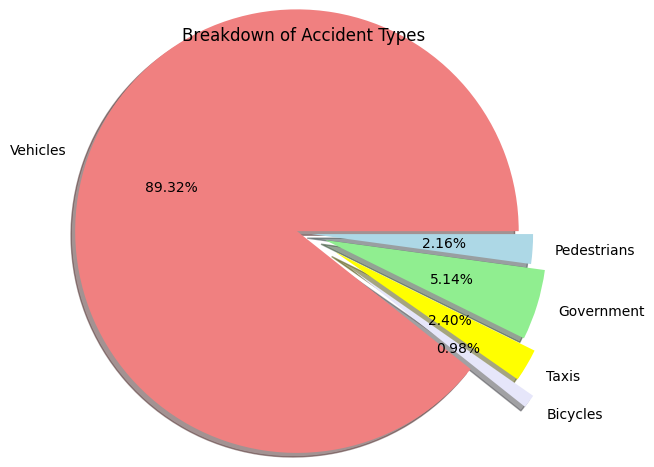

In [10]:
accident_type= [sum(vehresult), sum(bikeresult), sum(taxiresult), sum(govresult),sum(pedresult) ]

label_list= ['Vehicles','Bicycles','Taxis','Government','Pedestrians']
color_list= ('lightcoral','lavender', 'yellow', 'lightgreen', 'lightblue')
plt.title('Breakdown of Accident Types',loc= 'center')
plt.pie(accident_type,labels= label_list, radius= 1.5, colors= color_list, shadow= 'True', autopct='%1.2f%%', explode=(.05, .4, .25, .15, .05))
plt.show()

In this graph, I chose to visualize the breakdown of different types of vehicle categories involved. I opted for a pie chart because it effectively displays the proportions of each category. As observed, regular vehicles dominate the chart at ``89.32%`` of all accidents. It was a tad surprising to note that the following most common category was government vehicles at ``5.14%``, but this aligns with expectations given the number of governmental vehicles in the Washington D.C. area.

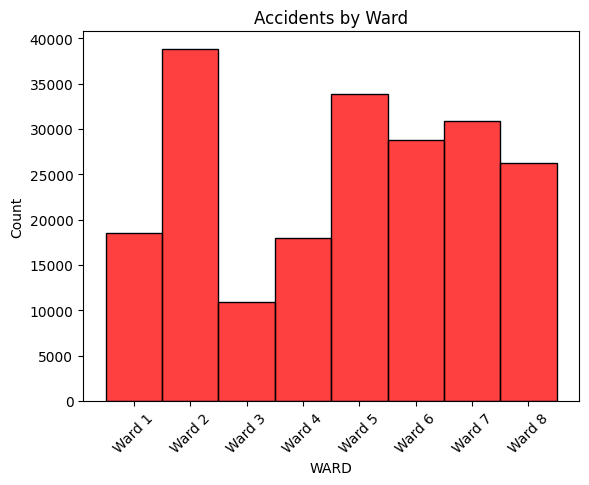

In [11]:
plt.xticks(rotation=45)
plt.title('Accidents by Ward', loc='center')
sns.histplot(data=df3.sort_values(by='WARD'), x='WARD', color='red')
plt.show()

Next, I aimed to visualize the distribution of accidents across all wards. I was particularly interested in understanding why Ward 2 had significantly more accidents than the rest. To investigate this, I searched for the populations of each ward from the 2020 census (https://planning.dc.gov/sites/default/files/dc/sites/op/publication/attachments/Map%202%20-%202020%20Census%20Population%20by%20Census%20Tract%20with%20Ward%20Table.pdf).

Upon examining the table, I was surprised to find that the populations of almost all wards fell within a relative range. However, the key insight emerged when considering the locations. Ward 2 includes downtown, Georgetown, and many other areas that contribute to increased traffic, providing a clear explanation for the higher number of accidents in that ward.




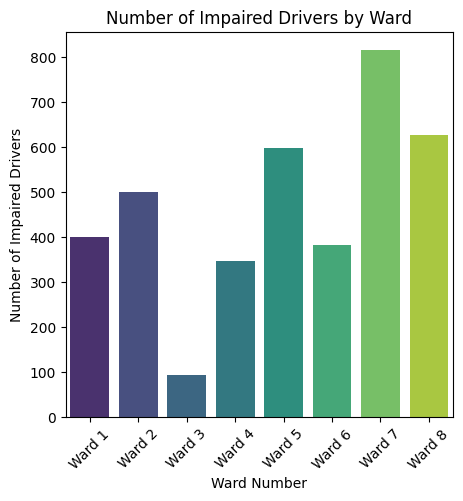

In [12]:
impaired_by_ward = df3.groupby('WARD')['DRIVERSIMPAIRED'].sum()



plt.figure(figsize=(5, 5))
plt.xticks(rotation=45)
sns.barplot(x=impaired_by_ward.index,
            y=impaired_by_ward.values,
            palette='viridis')
plt.xlabel('Ward Number')
plt.ylabel('Number of Impaired Drivers')
plt.title('Number of Impaired Drivers by Ward')
plt.show()

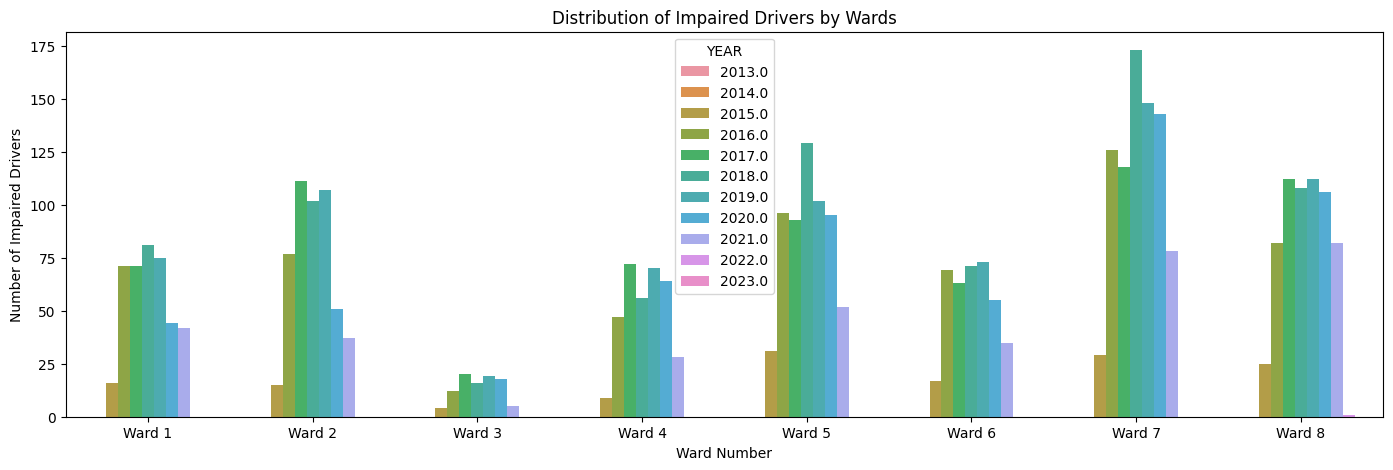

In [13]:
impaired_by_ward2= df3.groupby(['WARD', 'YEAR'])['DRIVERSIMPAIRED'].sum().reset_index()

plt.figure(figsize= (17, 5))
sns.barplot(x= 'WARD', y= 'DRIVERSIMPAIRED', hue= 'YEAR', data=impaired_by_ward2)
plt.xlabel('Ward Number')
plt.ylabel('Number of Impaired Drivers')
plt.title('Distribution of Impaired Drivers by Wards')
plt.show()

Following the graph of accidents by ward, I wanted to investigate if impairments were a contributing factor and if there was any correlation. Surprisingly, Ward 7 stood out more than Ward 2, which had the highest number of accidents. To delve deeper, I searched for lists of demographics by ward and found a public dashboard (https://www.dchealthmatters.org/demographicdata?id=131494) that provided various demographic information. The top of the page displayed the population by race, revealing a majority population of 86.63% Black and 4.41% White.

Further research led me to an article published in the NIH’s library of medicine (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7042035#:~:text=Unadjusted%20national%20crime%20statistics%20from,and%202%25%20were%20American%20Indian.) which presented unadjusted national crime statistics from 2016. Interestingly, it indicated that, among all individuals arrested for DUI, 82% were White, 23% were Latino, 14% were Black, and 2% were American Indian. This prompted me to look beyond race and ethnicity.

In the same research article, it was found that adults with less than a high school diploma had a lower rate of drinking and driving compared to those with a college education. Additionally, lower-income families `(Less than $35,000)` were also less likely to drive impaired. Returning to the demographics of Ward 7, I noted that the median household income was just over $49,500, and the percentage of those who had graduated high school or less was 50.92%.

While I cannot provide a definitive answer or conclusion due to the lack of necessary data, one speculation is that Ward 7 appears to be more residential and suburban, which may influence the patterns observed.